In [26]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
netflix_data = pd.read_csv("netflix_titles.csv")
df = pd.DataFrame(netflix_data)
df.head()
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [5]:
df.info()
df.shape
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
# checking for misssing values in columns
missing_values = df.isnull().sum()
print("missing values per column\n",missing_values)

#converting date added to datetime format
df["date_added"] = pd.to_datetime(df["date_added"], errors = "coerce")

#dropppin all rows where title or type is missing
df.dropna(subset= ["title" , "type"])

df.head(10)

missing values per column
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [7]:
#filtering movies released after 2015
movies_after_2015 = df[(df['type'] == 'Movie') & (df['release_year'] > 2015)]
movies_after_2015.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
13,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",NaN,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",When the clever but socially-awkward Tetê join...


In [80]:
#filtering shows from india
shows_from_india = df[(df["country"] == "India") & (df["type"] == "TV Show")]
shows_from_india.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
39,s40,TV Show,Chhota Bheem,NaN,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,2021-09-16,2021,TV-Y7,3 Seasons,Kids' TV,"A brave, energetic little boy with superhuman ..."
50,s51,TV Show,Dharmakshetra,NaN,"Kashmira Irani, Chandan Anand, Dinesh Mehta, A...",India,2021-09-15,2014,TV-PG,1 Season,"International TV Shows, TV Dramas, TV Sci-Fi &...","After the ancient Great War, the god Chitragup..."
66,s67,TV Show,Raja Rasoi Aur Anya Kahaniyan,NaN,NaN,India,2021-09-15,2014,TV-G,1 Season,"Docuseries, International TV Shows",Explore the history and flavors of regional In...
69,s70,TV Show,Stories by Rabindranath Tagore,NaN,NaN,India,2021-09-15,2015,TV-PG,1 Season,"International TV Shows, TV Dramas",The writings of Nobel Prize winner Rabindranat...


In [9]:
# Filter Movie type entries with duration > 90 minutes
long_movies = df[(df['type'] == 'Movie') & (df['duration'] > "90 min")].reset_index()
long_movies.head()

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
1,13,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",NaN,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",When the clever but socially-awkward Tetê join...
2,18,s19,Movie,Intrusion,Adam Salky,"Freida Pinto, Logan Marshall-Green, Robert Joh...",NaN,2021-09-22,2021,TV-14,94 min,Thrillers,After a deadly home invasion at a couple’s new...
3,28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,2021-09-19,2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...
4,38,s39,Movie,Birth of the Dragon,George Nolfi,"Billy Magnussen, Ron Yuan, Qu Jingjing, Terry ...","China, Canada, United States",2021-09-16,2017,PG-13,96 min,"Action & Adventure, Dramas",A young Bruce Lee angers kung fu traditionalis...


In [10]:
#creating a new column based on release date of movie
df["release_decade"] = ((df["release_year"] //10)*10).astype(str) + "s"
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,release_decade
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2020s
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2020s
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2020s
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2020s
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2020s
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2000s
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2010s
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2000s
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2000s


In [12]:
#getting unique values in column
print("Unique values in 'type':")
print(df["type"].nunique())


print("\nUnique values in 'country':")
print(df['country'].nunique())

print("\nUnique values in 'rating':")
print(df['rating'].unique())

Unique values in 'type':
2

Unique values in 'country':
748

Unique values in 'rating':
['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' nan 'TV-Y7-FV' 'UR']


In [16]:
type_counts = df.groupby('type')['title'].count().reset_index()
print(type_counts)

#top 5 countries with most movies and shows
top_countries = df["country"].value_counts().head(5).reset_index()
top_countries.head()

      type  title
0    Movie   6131
1  TV Show   2676


,country,count
0,United States,2818
1,India,972
2,United Kingdom,419
3,Japan,245
4,South Korea,199


In [121]:
average_release_year = df.groupby("rating")["release_year"].mean().round(1)
print("\nAverage release year for each rating type:")
average_release_year


Average release year for each rating type:


rating
66 min      2015.0
74 min      2017.0
84 min      2010.0
G           1997.8
NC-17       2015.0
NR          2010.9
PG          2008.4
PG-13       2009.3
R           2010.5
TV-14       2013.7
TV-G        2015.7
TV-MA       2016.7
TV-PG       2013.5
TV-Y        2017.2
TV-Y7       2015.5
TV-Y7-FV    2014.8
UR          1999.3
Name: release_year, dtype: float64

In [17]:
totl_num = df.groupby("release_year")["title"].value_counts().reset_index()
totl_num.head(18)

,release_year,title,count
0,1925,Pioneers: First Women Filmmakers*,1
1,1942,Prelude to War,1
2,1942,The Battle of Midway,1
3,1943,Undercover: How to Operate Behind Enemy Lines,1
4,1943,WWII: Report from the Aleutians,1
5,1943,Why We Fight: The Battle of Russia,1
6,1944,The Memphis Belle: A Story of a\nFlying Fortress,1
7,1944,The Negro Soldier,1
8,1944,Tunisian Victory,1
9,1945,Five Came Back: The Reference Films,1


In [20]:
# Total number of titles per release_year
total_titles = df.groupby('release_year')['title'].count()

# Count of Movies and TV Shows separately per release_year
type_counts = df.groupby(['release_year', 'type'])['title'].count().unstack(fill_value=0)

# Combine both into one DataFrame
combined = pd.concat([total_titles, type_counts], axis=1)
combined.columns = ['Total Titles', 'Movie', 'TV Show'] # Rename columns if needed

print(combined)

              Total Titles  Movie  TV Show
release_year                              
1925                     1      0        1
1942                     2      2        0
1943                     3      3        0
1944                     3      3        0
1945                     4      3        1
...                    ...    ...      ...
2017                  1032    767      265
2018                  1147    767      380
2019                  1030    633      397
2020                   953    517      436
2021                   592    277      315

[74 rows x 3 columns]


In [151]:
df['is_recent'] = df['release_year'] > 2015
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_minutes,release_decade,is_recent
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,2020s,True
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,2020s,True
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,2020s,True
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,2020s,True
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,2020s,True


In [152]:
recent_counts = df[df['is_recent']].groupby('country')['title'].count().sort_values(ascending=False)
print(recent_counts)

country
United States                                   1796
India                                            461
United Kingdom                                   286
South Korea                                      157
Japan                                            145
                                                ... 
India, United Kingdom, Canada, United States       1
India, United Kingdom                              1
India, Turkey                                      1
India, Nepal                                       1
Zimbabwe                                           1
Name: title, Length: 503, dtype: int64


In [176]:
most_common_rating = df[df['type'] == 'TV Show']['rating'].value_counts().idxmax()
print("most common tv show rating is:",most_common_rating)

#country with most content
top_country = df['country'].value_counts().idxmax()
print("country with most content on netflix :",top_country)

#counting mmoviezs and shows before and after 2015
recent_titles = (df['release_year'] > 2015).sum()
older_titles = (df['release_year'] <= 2015).sum()
print("\n")
print("Releases on netflix after 2015 are :",recent_titles)
print("Releases on netflix before 2015 are:",older_titles)

print("\n")
#average movies releases per year on netflix
avg_movie_year = df[df['type'] == 'Movie']['release_year'].mean().round(1)
print("Average release year for Movies:", avg_movie_year)

most common tv show rating is: TV-MA
country with most content on netflix : United States


Releases on netflix after 2015 are : 5656
Releases on netflix before 2015 are: 3151


Average release year for Movies: 2013.1


### Conclusion:
The majority of Netflix content comes from the United States, with TV-MA being the most common rating for TV Shows. Most titles in the dataset were released after 2015, showing a strong focus on recent content. The average release year for Netflix movies is around 2015–2017, highlighting Netflix’s emphasis on modern and up-to-date media.

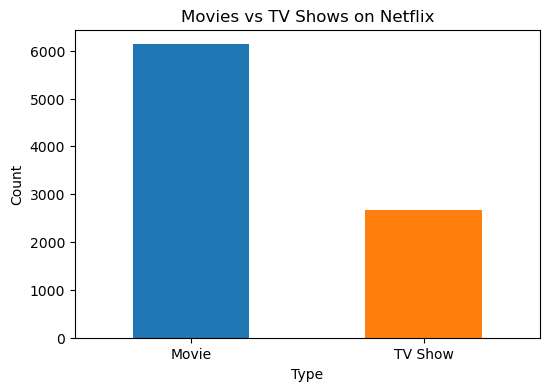

In [21]:
plt.figure(figsize=(6,4))
df['type'].value_counts().plot(kind='bar', color=['#1f77b4','#ff7f0e'])
plt.title("Movies vs TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


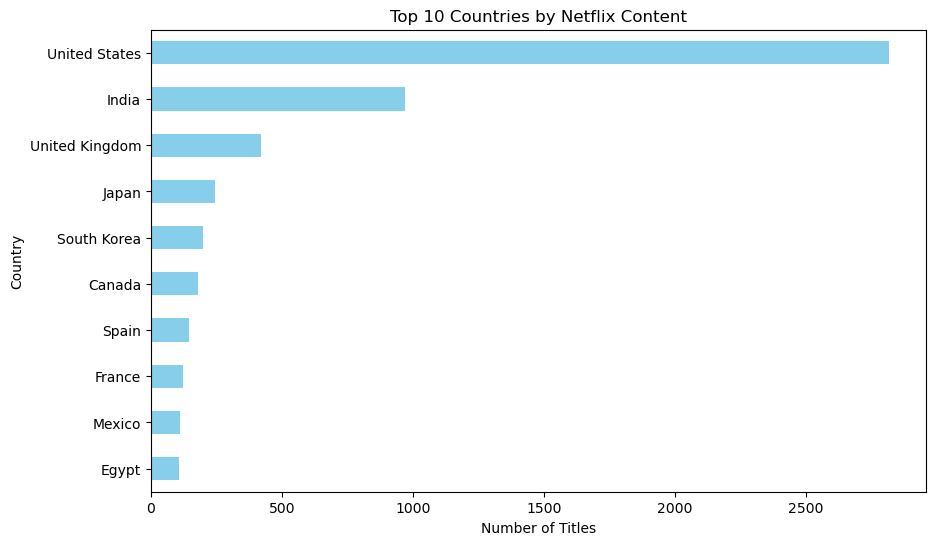

In [22]:
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10,6))
top_countries.plot(kind='barh', color='skyblue')
plt.title("Top 10 Countries by Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.gca().invert_yaxis()
plt.show()


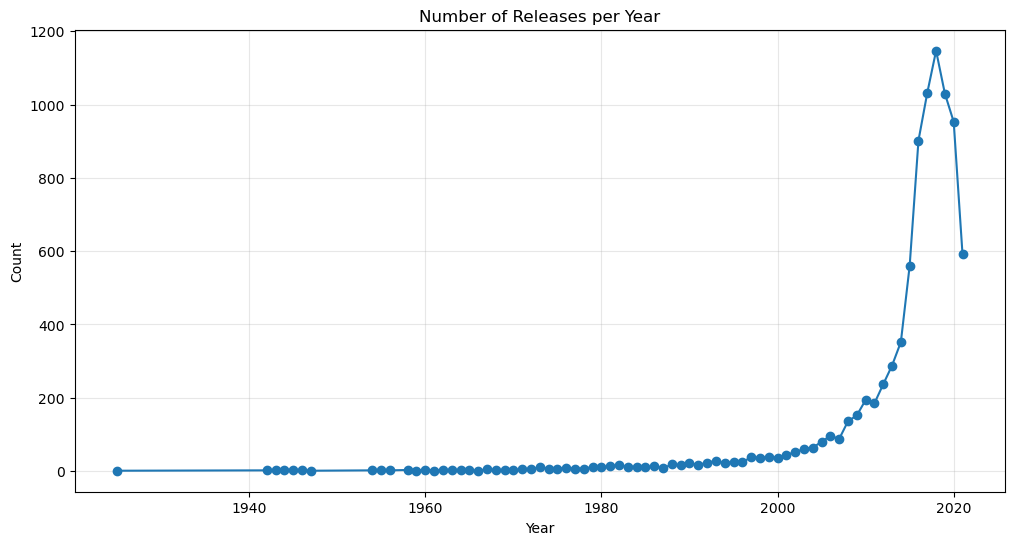

In [23]:
releases_per_year = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(12,6))
plt.plot(releases_per_year.index, releases_per_year.values, marker='o')
plt.title("Number of Releases per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True, alpha=0.3)
plt.show()


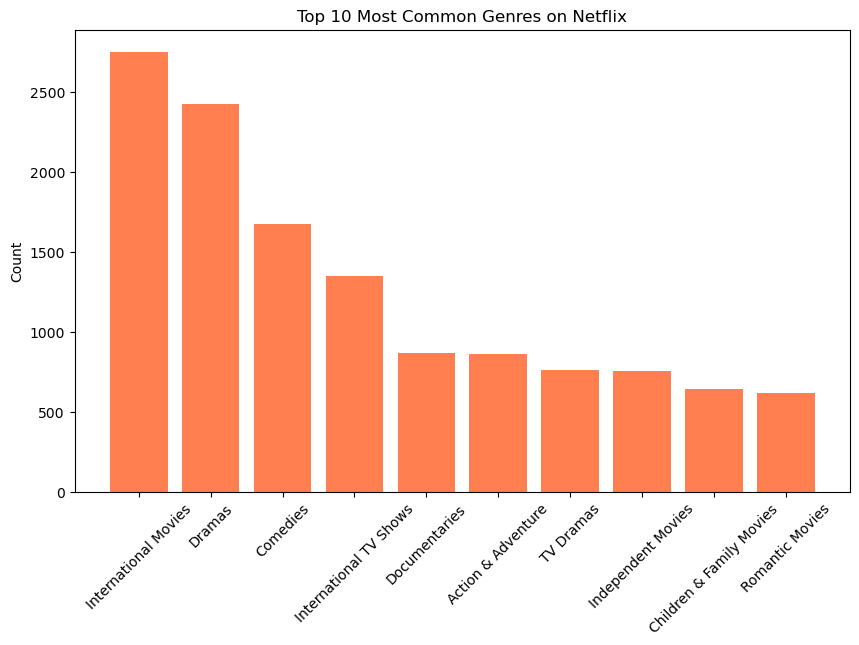

In [24]:
from collections import Counter

genres = df['listed_in'].dropna().str.split(', ')
genre_counts = Counter([g for sublist in genres for g in sublist])

top_genres = dict(sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)[:10])

plt.figure(figsize=(10,6))
plt.bar(top_genres.keys(), top_genres.values(), color='coral')
plt.title("Top 10 Most Common Genres on Netflix")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()


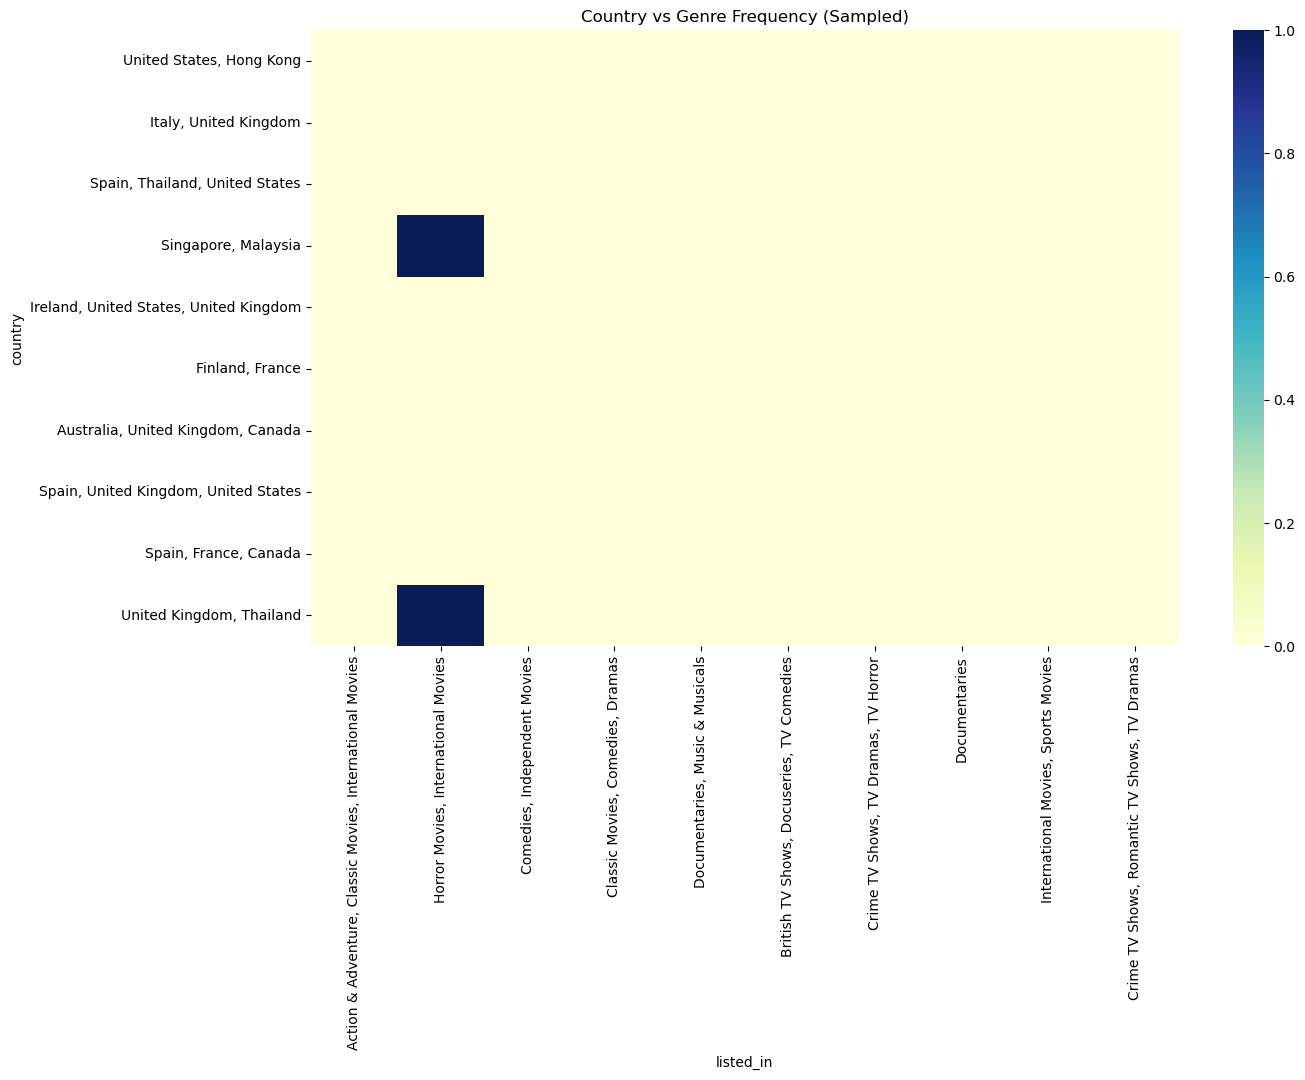

In [27]:
country_genre = df.explode('listed_in')
country_genre = country_genre.groupby(['country','listed_in']).size().unstack(fill_value=0)

plt.figure(figsize=(14,8))
sns.heatmap(country_genre.sample(10, axis=0).sample(10, axis=1), cmap="YlGnBu")
plt.title("Country vs Genre Frequency (Sampled)")
plt.show()
